In [1]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
import joblib
import matplotlib.pyplot as plt

In [2]:
train_features, train_labels = joblib.load('train_features.pkl')
val_features, val_labels = joblib.load('val_features.pkl')

train_X, val_X, train_y, val_y = train_features, val_features, train_labels, val_labels

In [3]:
model = LogisticRegression(max_iter=200, class_weight='balanced', multi_class='multinomial', random_state=1)
model.fit(train_X, train_y)

c:\Users\DELL\anaconda3\envs\grayjay\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\grayjay\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=200,
                   multi_class='multinomial', random_state=1)

In [4]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [5]:
prob = model.predict_proba(val_X)
pred = model.predict(val_X)

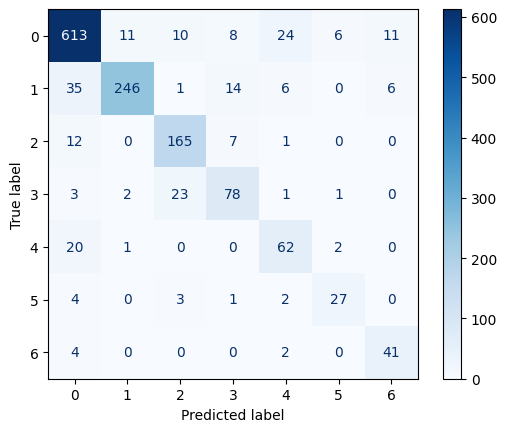

In [6]:
mcm = sklearn.metrics.confusion_matrix(val_y, pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=mcm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
f1_score = sklearn.metrics.f1_score(val_y, pred, average='weighted')
print(f1_score)

0.8490308207288563


In [8]:
roc_auc_score = sklearn.metrics.roc_auc_score(val_y, prob, average='macro', multi_class='ovo')
print(roc_auc_score)

0.9735401766904259


In [9]:
from sklearn.metrics import classification_report

print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       691
           1       0.80      0.95      0.87       260
           2       0.89      0.82      0.85       202
           3       0.72      0.72      0.72       108
           4       0.73      0.63      0.68        98
           5       0.73      0.75      0.74        36
           6       0.87      0.71      0.78        58

    accuracy                           0.85      1453
   macro avg       0.81      0.78      0.79      1453
weighted avg       0.85      0.85      0.85      1453



In [10]:
import pickle

with open("models\\logisticRegression.pkl", "wb") as f:
    pickle.dump(model, f)